In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf #OLS
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'matplotlib'

Cleaning

In [ ]:
health_full = pd.read_csv('ADHD.csv')
health_full.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,...,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,...,1,3,44,44.0,-0.112652,NaN,NaN,NaN,NaN,NaN
1,21,male,NaN,english,no,none,none,no,none,not applicable,...,1,0,6,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,...,0,2,28,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,...,1,2,23,23.0,-2.244203,NaN,NaN,NaN,NaN,NaN
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,...,1,0,12,12.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
health_full.rename(columns={
    'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school': 'past_symptoms',
    'if_yes_please_list_these_difficulties_and_or_symptoms': 'symptom_list',
    'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started': 'symptom_age',
    'have_you_ever_been_diagnosed_with_a_mental_illness': 'diagnosed',
    'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses': 'diagnosis_type',
    'was_this_diagnosis_made_before_or_after_you_left_high_school': 'diagnosis_time',
    'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this': 'diagnosis_age',
    'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one': 'medication_used',
    'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one': 'medication_now',
    'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one': 'therapy_used',
    'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one': 'therapy_now'
}, inplace=True) # rename for readability

In [ ]:
# List of columns I want to drop
columns_to_drop = [ 'bdi1_item_1', 'bdi1_item_2', 'bdi1_item_3', 'bdi1_item_4', 'bdi1_item_5', 'bdi1_item_6', 'bdi1_item_7', 'bdi1_item_8', 'bdi1_item_9',
                   'bdi1_item_10', 'bdi1_item_11', 'bdi1_item_12', 'bdi1_item_13','bdi1_item_14', 'bdi1_item_15', 'bdi1_item_16','bdi1_item_17', 'bdi1_item_18',
                   'bdi1_item_19','bdi1_item_20', 'bdi1_item_21',
                   'audit1_item_1', 'audit1_item_2', 'audit1_item_3', 'audit1_item_4', 'audit1_item_5', 'audit1_item_6', 'audit1_item_7', 'audit1_item_8',
                   'audit1_item_9',
                   'asrs1_item_1' , 'asrs1_item_2', 'asrs1_item_3', 'asrs1_item_4', 'asrs1_item_5', 'asrs1_item_6', 'asrs1_item_7', 'asrs1_item_8',
                   'asrs1_item_9', 'asrs1_item_10', 'asrs1_item_11', 'asrs1_item_12', 'asrs1_item_13', 'asrs1_item_14', 'asrs1_item_15', 'asrs1_item_16',
                   'asrs1_item_17', 'asrs1_item_18',
                   'bai1_item_1', 'bai1_item_2', 'bai1_item_3','bai1_item_4', 'bai1_item_5', 'bai1_item_6', 'bai1_item_7', 'bai1_item_8', 'bai1_item_9',
                   'bai1_item_10', 'bai1_item_11', 'bai1_item_12', 'bai1_item_13','bai1_item_14', 'bai1_item_15', 'bai1_item_16','bai1_item_17', 'bai1_item_18',
                   'bai1_item_19','bai1_item_20', 'bai1_item_21',
                   'aas1_item_1', 'aas1_item_2', 'aas1_item_3', 'aas1_item_4', 'aas1_item_5', 'aas1_item_6', 'aas1_item_7', 'aas1_item_8', 'aas1_item_9',
                   'Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114', 'specify','nbt_year','home_language','aas_change',
                    'nbt_al', 'nbt_ql', 'nbt_did_math', 'nbt_completed', 'nbt_alql_ave','nbt_math'
] # try and create a loop for this at the end

# Drop the columns
health = health_full.drop(columns=columns_to_drop, inplace=False) # inplace asks if a new dataset is to be created or the original is modified

In [ ]:
health.shape


(315, 14)

In [ ]:
health.columns

Index(['age', 'sex', 'symptom_age', 'diagnosis_age', 'bdi1_total',
       'audit1_total', 'aas1_total', 'psy1004_grade', 'nbt_ave', 'matric_mark',
       'asrs1_total.x', 'bai1_total', 'diagnosed_status', 'ADHD_positive'],
      dtype='object')

In [ ]:
health.head()

,age,sex,past_symptoms,symptom_list,symptom_age,diagnosed,diagnosis_type,diagnosis_time,diagnosis_age,medication_used,...,therapy_now,bdi1_total,audit1_total,aas1_total,psy1004_grade,nbt_ave,matric_mark,asrs1_total.x,bai1_total,asrs1_total.y
0,22,female,no,na,na,no,na,not applicable,na,not applicable,...,not applicable,24,0,32,65,56,84,19,44,44.0
1,21,male,no,none,none,no,none,not applicable,none,not applicable,...,not applicable,5,4,35,67,73,66,31,6,6.0
2,19,female,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,14,yes,...,no,20,14,30,56,50,69,52,28,29.0
3,20,male,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,18,yes,...,yes,10,14,24,76,88,80,41,23,23.0
4,20,female,no,none,none,no,NaN,not applicable,NaN,no,...,no,7,0,30,59,68,77,27,12,12.0


In [ ]:
health.isnull().sum()
# fill symptoms list,diagnosis_type 0 to no

age                  0
sex                  0
past_symptoms        0
symptom_list        81
symptom_age         77
diagnosed            0
diagnosis_type     129
diagnosis_time       0
diagnosis_age      150
medication_used      0
medication_now       0
therapy_used         0
therapy_now          0
bdi1_total           0
audit1_total         0
aas1_total           0
psy1004_grade        0
nbt_ave              0
matric_mark          0
asrs1_total.x        0
bai1_total           0
asrs1_total.y        1
dtype: int64

In [ ]:
health['symptom_list'] = health['symptom_list'].fillna('No')
health['diagnosis_type'] = health['diagnosis_type'].fillna('No')

health.isnull().sum()

age                  0
sex                  0
past_symptoms        0
symptom_list         0
symptom_age         77
diagnosed            0
diagnosis_type       0
diagnosis_time       0
diagnosis_age      150
medication_used      0
medication_now       0
therapy_used         0
therapy_now          0
bdi1_total           0
audit1_total         0
aas1_total           0
psy1004_grade        0
nbt_ave              0
matric_mark          0
asrs1_total.x        0
bai1_total           0
asrs1_total.y        1
dtype: int64

In [ ]:
health['diagnosed'].value_counts()

diagnosed
no                                                                   296
not formally diagnosed                                               106
yes, formally diagnosed by a doctor or mental health professional    104
Name: count, dtype: int64

In [ ]:
# Example thresholds
adhd_threshold = 24
audit_threshold = 8
depression_threshold = 20
anxiety_threshold = 20
aas_threshold = 25
# dividing if illness or healthy
# 1. Create diagnosed_status column
def determine_diagnosed_status(row):
    if row['diagnosed'] == 'yes,formally diagnosed by a doctor or mental health professional':
        return 'illness'
    elif row['diagnosed'] == 'not formally diagnosed':
        if (row['asrs1_total.x'] >= adhd_threshold or
            row['bdi1_total'] >= depression_threshold or
            row['bai1_total'] >= anxiety_threshold or
            row['audit1_total'] >= audit_threshold or
            row['aas1_total'] >= aas_threshold):
            return 'ill'
        else:
            return 'healthy'
    else:
        # If diagnosed has other entries or missing values
        return 'healthy'

health['diagnosed_status'] = health.apply(determine_diagnosed_status, axis=1)

In [ ]:
health['diagnosed_status'].value_counts()

diagnosed_status
healthy    400
ill        106
Name: count, dtype: int64

In [ ]:
#remove unnecassary columns
columns_remove = ['past_symptoms', 'symptom_list', 'diagnosis_time','medication_used', 'medication_now', 'therapy_used', 'therapy_now']
# Drop the columns
health = health.drop(columns=columns_remove, inplace=False) # inplace asks if a new dataset is to be created or the original is modified 0

health.shape

(506, 16)

In [ ]:
health.isnull().sum()

age                   0
sex                   0
symptom_age          77
diagnosed             0
diagnosis_type        0
diagnosis_age       150
bdi1_total            0
audit1_total          0
aas1_total            0
psy1004_grade         0
nbt_ave               0
matric_mark           0
asrs1_total.x         0
bai1_total            0
asrs1_total.y         1
diagnosed_status      0
dtype: int64

In [ ]:
# Step 1: Convert both columns to numeric, coercing invalid entries like 'na' to NaN
health['diagnosis_age'] = pd.to_numeric(health['diagnosis_age'], errors='coerce')
health['symptom_age'] = pd.to_numeric(health['symptom_age'], errors='coerce')

# Step 2: Fill NaN values with 0
health['diagnosis_age'] = health['diagnosis_age'].fillna(0).astype(int)
health['symptom_age'] = health['symptom_age'].fillna(0).astype(int)

health.isnull().sum()

age                 0
sex                 0
symptom_age         0
diagnosed           0
diagnosis_type      0
diagnosis_age       0
bdi1_total          0
audit1_total        0
aas1_total          0
psy1004_grade       0
nbt_ave             0
matric_mark         0
asrs1_total.x       0
bai1_total          0
asrs1_total.y       1
diagnosed_status    0
dtype: int64

In [ ]:
health = health[~(
    (health['diagnosed_status'] == 'ill') &
    ((health['diagnosis_age'] > 18) | (health['symptom_age'] > 18))
)]

health = health[~(
    (health['diagnosed_status'] == 'healthy') &
    ((health['diagnosis_age'] != 0) | (health['symptom_age'] != 0))
)]

health.shape

(319, 16)

In [ ]:
# 2. Create ADHD positive binary column
def adhd_positive(row):
    return int((row['asrs1_total.x'] >= adhd_threshold) or (row['asrs1_total.y'] >= adhd_threshold))

health['ADHD_positive'] = health.apply(adhd_positive, axis=1)

health.columns

health['ADHD_positive'].sum()

# Drop the columns
health.drop(['diagnosed', 'asrs1_total.y','diagnosis_type'], axis=1, inplace=True)

health.columns

# 4. Clean sex column: keep only male or female, drop others
health = health[health['sex'].str.lower().isin(['male', 'female'])].copy()

health.shape

health.head(15)

health.dtypes

le= preprocessing.LabelEncoder()

health["sex"] = le.fit_transform(health["sex"])
health["sex"].unique()
print(le.classes_)# So 0= female and 1 is male

health["diagnosed_status"] = le.fit_transform(health["diagnosed_status"])
health['diagnosed_status'].unique()
print(le.classes_) # So 0= healthy and 1 is ill

health.dtypes

['female' 'male']
['healthy' 'ill']


age                 int64
sex                 int64
symptom_age         int64
diagnosis_age       int64
bdi1_total          int64
audit1_total        int64
aas1_total          int64
psy1004_grade       int64
nbt_ave             int64
matric_mark         int64
asrs1_total.x       int64
bai1_total          int64
diagnosed_status    int64
ADHD_positive       int64
dtype: object

Visualisation

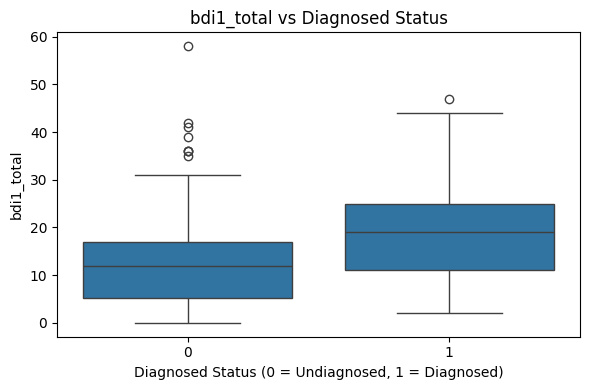

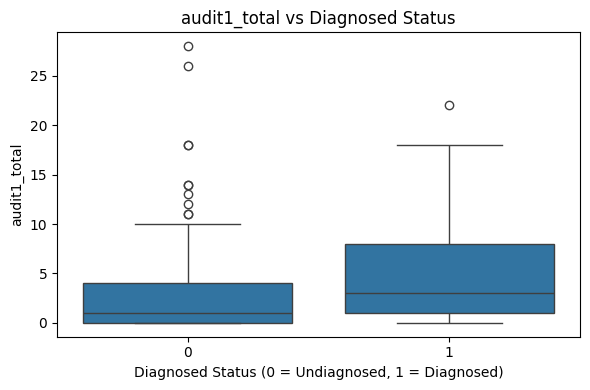

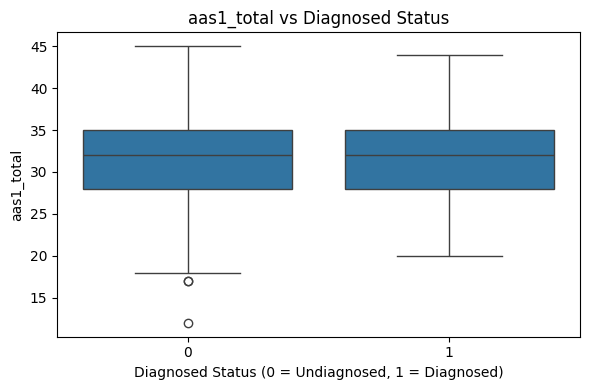

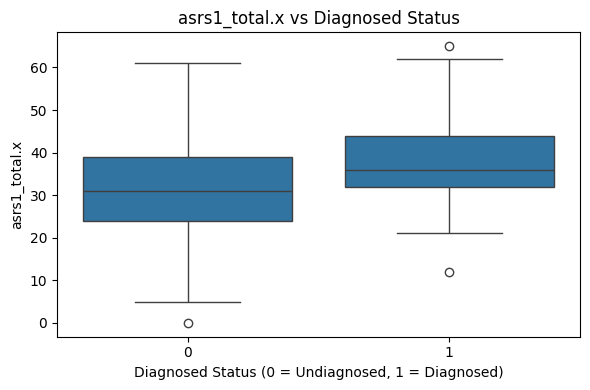

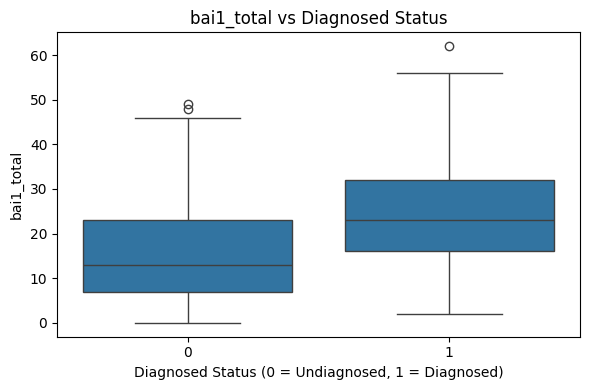

In [ ]:
score_vars = ['bdi1_total', 'audit1_total', 'aas1_total', 'asrs1_total.x', 'bai1_total']

for var in score_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosed_status', y=var, data=health)
    plt.title(f'{var} vs Diagnosed Status')
    plt.xlabel('Diagnosed Status (0 = Undiagnosed, 1 = Diagnosed)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

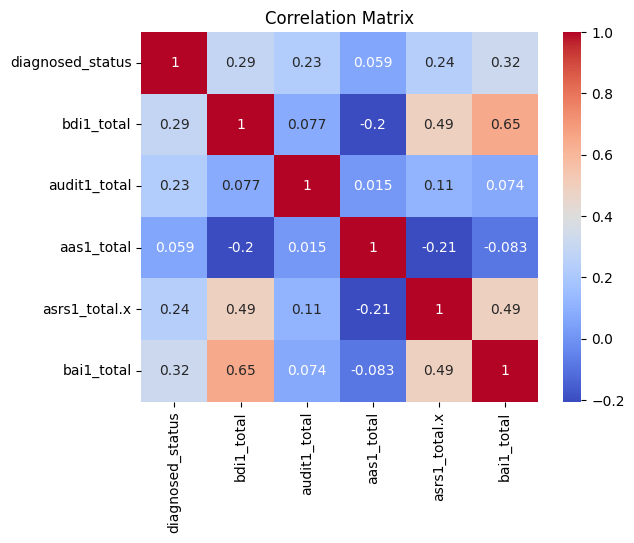

In [ ]:
subset = health[['diagnosed_status', 'bdi1_total', 'audit1_total', 'aas1_total', 'asrs1_total.x', 'bai1_total']]
corr = subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

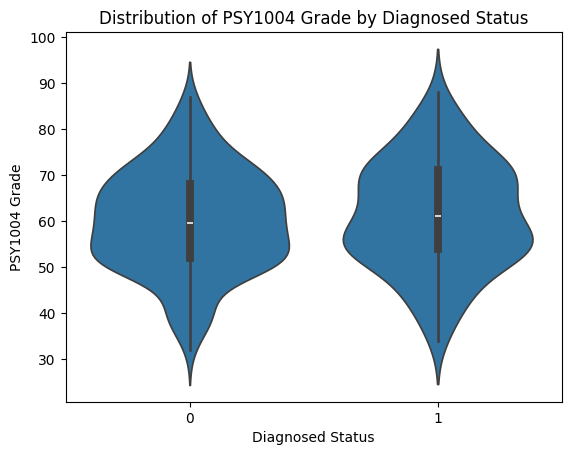

In [ ]:
sns.violinplot(x='diagnosed_status', y='psy1004_grade', data=health)
plt.title('Distribution of PSY1004 Grade by Diagnosed Status')
plt.xlabel('Diagnosed Status')
plt.ylabel('PSY1004 Grade')
plt.show()

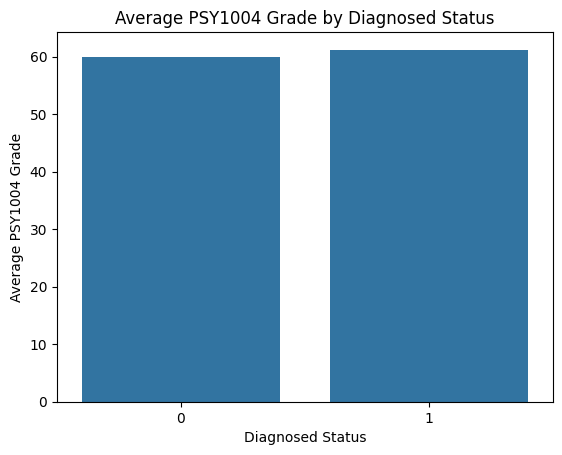

In [ ]:
avg_scores = health.groupby('diagnosed_status')['psy1004_grade'].mean().reset_index()

sns.barplot(x='diagnosed_status', y='psy1004_grade', data=avg_scores)
plt.title('Average PSY1004 Grade by Diagnosed Status')
plt.xlabel('Diagnosed Status')
plt.ylabel('Average PSY1004 Grade')
plt.show()

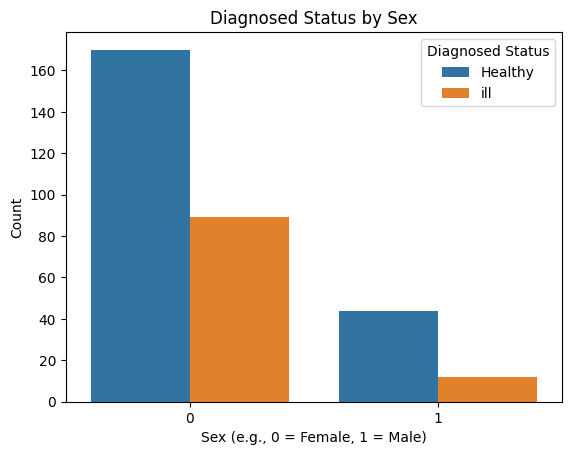

In [ ]:
sns.countplot(x='sex', hue='diagnosed_status', data=health)
plt.title('Diagnosed Status by Sex')
plt.xlabel('Sex (e.g., 0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Diagnosed Status', labels=['Healthy', 'ill'])
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

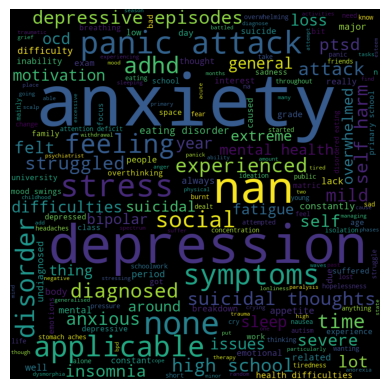

In [ ]:
stopwords= set(STOPWORDS)
#loops
comment_words = ""
for value in health_full.symptom_list:   # loop for all the content to convert everthing in words and then split them
  value = str(value)
  tokens = value.split()
  for i in range(len(tokens)): # then we nest the loop to convert every letter in each word to a lower case
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+ " "  #comment_words will give a space and will keep joining the tokens in a loop
  #comment_words = comment_words joined tokens .Spaces have emphasis


word_cloud = WordCloud(stopwords=stopwords,background_color="black",width=800,height=800).generate(comment_words)
plt.imshow(word_cloud)
plt.axis("off")

Unsuccessful model

NameError: name 'smf' is not defined

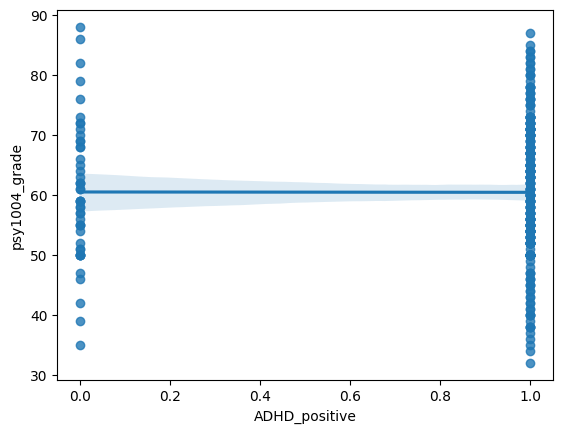

In [ ]:
health.head()

health_adhd = health.drop(['bdi1_total','audit1_total','aas1_total', 'matric_mark','asrs1_total.x','bai1_total','diagnosed_status'], axis=1, inplace=False)

health_adhd.head()

health['ADHD_positive'].unique()
# 1 is Healthy and 0 is ADHD

sns.regplot(x= health['ADHD_positive'],y= health['psy1004_grade'])

model_adhd = smf.ols('psy1004_grade~ADHD_positive',data=health).fit()

model_adhd.params # gives us the parameters taken for the model

model_adhd.summary()



corr_adhd = health_adhd.corr()
corr_adhd

model_adhd_all = smf.ols('ADHD_positive~sex+age+symptom_age+diagnosis_age+psy1004_grade+nbt_ave',data=health_adhd).fit()

model_adhd_all.summary()

mental_health = health.drop(['bdi1_total','audit1_total','aas1_total', 'matric_mark','asrs1_total.x','bai1_total','ADHD_positive'], axis=1, inplace=False)

mental_health.head()

model_mental_health = smf.ols('psy1004_grade~diagnosed_status',data=mental_health).fit()

model_mental_health.params

rmse = (metrics.mean_squared_error(mental_health['psy1004_grade'],model_mental_health.predict(mental_health['diagnosed_status'])))**0.5
rmse

model_mental_health.summary()

model_mental_all = smf.ols('diagnosed_status~sex+age+symptom_age+diagnosis_age+psy1004_grade+nbt_ave',data=mental_health).fit()

model_mental_all.summary()

Accuracy: 0.7619


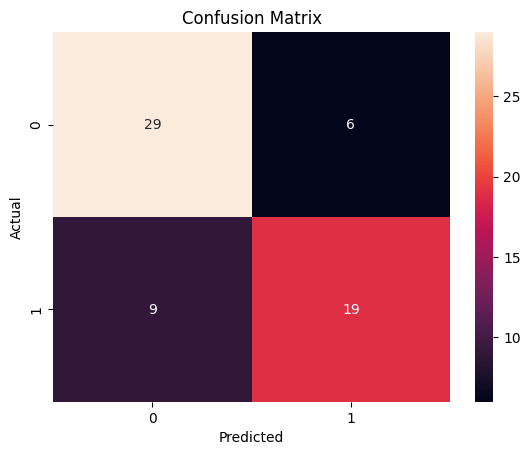

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.76      0.68      0.72        28

    accuracy                           0.76        63
   macro avg       0.76      0.75      0.76        63
weighted avg       0.76      0.76      0.76        63

Accuracy: 0.8987


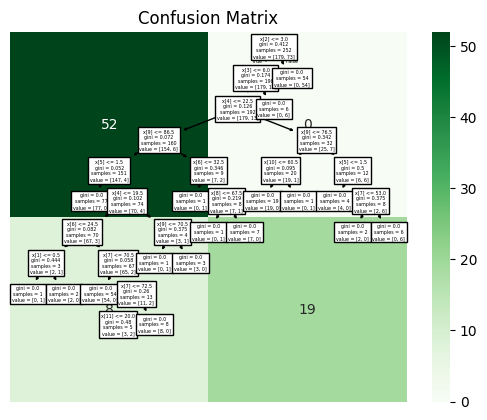

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        52
           1       1.00      0.70      0.83        27

    accuracy                           0.90        79
   macro avg       0.93      0.85      0.88        79
weighted avg       0.91      0.90      0.89        79

Accuracy: 0.9620253164556962
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.96      0.92      0.94        25

    accuracy                           0.96        79
   macro avg       0.96      0.95      0.96        79
weighted avg       0.96      0.96      0.96        79



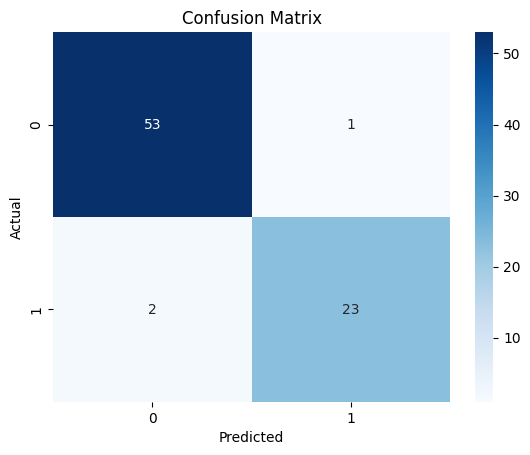

   age  sex  symptom_age  diagnosis_age  bdi1_total  audit1_total  aas1_total  \
0   22    0            0              0          24             0          32   
1   21    1            0              0           5             4          35   
2   19    0           15             14          20            14          30   
4   20    0            0              0           7             0          30   
5   20    1            0              0           2             0          36   

   psy1004_grade  nbt_ave  matric_mark  asrs1_total.x  bai1_total  \
0             65       56           84             19          44   
1             67       73           66             31           6   
2             56       50           69             52          28   
4             59       68           77             27          12   
5             70       80           65             33           9   

   diagnosed_status  ADHD_positive  
0                 0              1  
1                 0     

In [ ]:
# Model

health.head() # try without age and diagnosis_age

health = health.dropna(axis=1, how='all')

health.shape

y= health['diagnosed_status']

#x= health.drop(['diagnosed_status','age'],axis=1)
x = health.drop(columns=['diagnosed_status', 'ADHD_positive'])  # drop targets/labels

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) # 0.3 is written so that the 20% is not considered as it is used in testing
#the data is divided into train and test from the 100% we are splitting it now

tree_model = DecisionTreeClassifier()

tree_model.fit(x_train,y_train)

tree_model.score(x_train,y_train)

tree_model.score(x_test,y_test)

y_pred = tree_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(y_test,y_pred))

tree.plot_tree(tree_model)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(x_train, y_train)


y_pred = logreg_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))


# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train SVM
SVM_model = SVC(kernel='rbf', class_weight='balanced')  # 'balanced' helps with imbalance
SVM_model.fit(x_train_scaled, y_train)

# Predict
y_pred = SVM_model.predict(x_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(health.head())       # shows first 5 rows
print(health.info())       # summary of columns and types
print(health.describe())   # stats of numerical columns
print(health['diagnosed_status'].value_counts())  # class distribution

In [ ]:
# Deployment

#save model
import pickle
filename = 'finalized_model.sav'
pickle.dump(SVM_model, open(filename, 'wb'))


x_test.head()

#load model
load_model = pickle.load(open(filename, 'rb'))
load_model.predict([[17, 0, 0, 0,12, 20, 6, 22, 80, 70, 50, 20]])

array([0])

In [ ]:
health.columns

NameError: name 'health' is not defined